Exploración del uso de la libreria, replicando el ejemplo de la compuerta XOR pero transformandolo para aproximar una compuerta AND.

In [73]:
import torch
from logic_explained_networks import lens

In [74]:
# Set the random seed for repeatibility purposes
lens.utils.base.set_seed(0)

# create a dataset, a tensor of 100 rows and 4 columns with data uniformly between 0 and 1
x = torch.rand([100, 4])

# create target vector
y = (x[:, 0] >= 0.5) & (x[:, 1] >= 0.5)

data = torch.utils.data.TensorDataset(x, y)

In [75]:
# Dataset splitting into train, validation and testing.
train_data, val_data, test_data = torch.utils.data.random_split(data, [80, 10, 10])
x_train, y_train = data[train_data.indices]
x_val, y_val = data[val_data.indices]
x_test, y_test = data[test_data.indices]

# model instantiation
model = lens.models.XMuNN(n_classes=2, n_features=4,
                          hidden_neurons=[3], loss=torch.nn.CrossEntropyLoss())

# training
model.fit(train_data, val_data, epochs=50, l_r=0.1)

Epoch: 1/50, Loss: 0.579, Tr_acc: 77.50, Val_acc: 60.00, best_e: -1
Epoch: 2/50, Loss: 0.550, Tr_acc: 77.50, Val_acc: 60.00, best_e: -1
Epoch: 3/50, Loss: 0.536, Tr_acc: 77.50, Val_acc: 60.00, best_e: -1
Epoch: 4/50, Loss: 0.510, Tr_acc: 77.50, Val_acc: 60.00, best_e: -1
Epoch: 5/50, Loss: 0.492, Tr_acc: 77.50, Val_acc: 60.00, best_e: -1
Epoch: 6/50, Loss: 0.477, Tr_acc: 77.50, Val_acc: 60.00, best_e: -1
Epoch: 7/50, Loss: 0.447, Tr_acc: 77.50, Val_acc: 60.00, best_e: -1
Epoch: 8/50, Loss: 0.411, Tr_acc: 77.50, Val_acc: 60.00, best_e: -1
Epoch: 9/50, Loss: 0.379, Tr_acc: 77.50, Val_acc: 70.00, best_e: -1
Epoch: 10/50, Loss: 0.345, Tr_acc: 80.00, Val_acc: 90.00, best_e: -1
Epoch: 11/50, Loss: 0.311, Tr_acc: 87.50, Val_acc: 100.00, best_e: -1
Epoch: 12/50, Loss: 0.283, Tr_acc: 96.25, Val_acc: 100.00, best_e: -1
Epoch: 13/50, Loss: 0.256, Tr_acc: 93.75, Val_acc: 100.00, best_e: -1
Epoch: 14/50, Loss: 0.230, Tr_acc: 93.75, Val_acc: 100.00, best_e: -1
Epoch: 15/50, Loss: 0.212, Tr_acc: 95.0

/home/jdum/PycharmProjects/URENA_MELENDEZ_PL/logic_explained_networks/lens/models/base.py:348: UserWarning: Loaded model does not have time or explanations. They need to be recalculated but time will only consider rule extraction time.
  warnings.warn("Loaded model does not have time or explanations. "


,Tot losses,Train accs,Val accs,Best epoch
0,0.578810,77.50,60.0,50
1,0.550012,77.50,60.0,50
2,0.536012,77.50,60.0,50
3,0.510130,77.50,60.0,50
4,0.492443,77.50,60.0,50
5,0.476678,77.50,60.0,50
6,0.446680,77.50,60.0,50
7,0.410562,77.50,60.0,50
8,0.378703,77.50,70.0,50
9,0.345119,80.00,90.0,50


In [76]:
# get accuracy on test samples
test_acc = model.evaluate(test_data)
print("Test accuracy:", test_acc)

# get first order 1ogic explanations for a specific target class
target_class = 1
concept_names = ['x1', 'x2', 'x3', 'x4']
formula = model.get_global_explanation(x_train, y_train, target_class,
                                       top_k_explanations=2, concept_names=concept_names)
print(f"{formula} <-> f{target_class}")

# compute explanation accuracy
exp_accuracy, _ = lens.logic.test_explanation(formula, target_class, x_test, y_test,
                                              concept_names=concept_names)
print("Logic Test Accuracy:", exp_accuracy)


Test accuracy: 90.0
x1 & x2 <-> f1
Logic Test Accuracy: 100.0


Por curiosidad, vamos a mover el threshold de la función que obtiene los valores de y, para ver si los resultados son similares.

In [78]:
# Set the random seed for repeatibility purposes
lens.utils.base.set_seed(0)

# Define the number of values below and above 0.3
num_values = 1000
num_below = num_values // 2
num_above = num_values - num_below

# Generate random values
below_threshold = torch.rand(num_below, 4) * 0.3
above_threshold = 0.3 + torch.rand(num_above, 4) * 0.7

# Concatenate below and above threshold values
x = torch.cat((below_threshold, above_threshold), dim=0)

# create target vector
y = (x[:, 0] >= 0.3) & (x[:, 1] >= 0.3)

data = torch.utils.data.TensorDataset(x, y)

# Dataset splitting into train, validation and testing.
train_data, val_data, test_data = torch.utils.data.random_split(data, [700, 150, 150])
x_train, y_train = data[train_data.indices]
x_val, y_val = data[val_data.indices]
x_test, y_test = data[test_data.indices]

# model instantiation
model = lens.models.XMuNN(n_classes=2, n_features=4,
                          hidden_neurons=[30], loss=torch.nn.CrossEntropyLoss())

# training
model.fit(train_data, val_data, epochs=500, l_r=0.1)

# get accuracy on test samples
test_acc = model.evaluate(test_data)
print("Test accuracy:", test_acc)

# get first order 1ogic explanations for a specific target class
target_class = 1
concept_names = ['x1', 'x2', 'x3', 'x4']
formula = model.get_global_explanation(x_train, y_train, target_class,
                                       top_k_explanations=2, concept_names=concept_names)
print(f"{formula} <-> f{target_class}")

# compute explanation accuracy
exp_accuracy, _ = lens.logic.test_explanation(formula, target_class, x_test, y_test,
                                              concept_names=concept_names)
print("Logic Test Accuracy:", exp_accuracy)


Epoch: 1/500, Loss: 0.728, Tr_acc: 49.71, Val_acc: 45.33, best_e: -1
Epoch: 2/500, Loss: 0.661, Tr_acc: 50.29, Val_acc: 52.67, best_e: -1
Epoch: 3/500, Loss: 0.458, Tr_acc: 57.86, Val_acc: 100.00, best_e: -1
Epoch: 4/500, Loss: 0.285, Tr_acc: 100.00, Val_acc: 99.33, best_e: -1
Epoch: 5/500, Loss: 0.192, Tr_acc: 99.14, Val_acc: 100.00, best_e: -1
Epoch: 6/500, Loss: 0.098, Tr_acc: 100.00, Val_acc: 100.00, best_e: -1
Epoch: 7/500, Loss: 0.059, Tr_acc: 100.00, Val_acc: 100.00, best_e: -1
Epoch: 8/500, Loss: 0.037, Tr_acc: 100.00, Val_acc: 100.00, best_e: -1
Epoch: 9/500, Loss: 0.024, Tr_acc: 100.00, Val_acc: 100.00, best_e: -1
Epoch: 10/500, Loss: 0.018, Tr_acc: 100.00, Val_acc: 100.00, best_e: -1
Epoch: 11/500, Loss: 0.016, Tr_acc: 100.00, Val_acc: 100.00, best_e: -1
Epoch: 12/500, Loss: 0.015, Tr_acc: 100.00, Val_acc: 100.00, best_e: -1
Epoch: 13/500, Loss: 0.015, Tr_acc: 100.00, Val_acc: 100.00, best_e: -1
Epoch: 14/500, Loss: 0.015, Tr_acc: 100.00, Val_acc: 100.00, best_e: -1
Epoch: 1

/home/jdum/PycharmProjects/URENA_MELENDEZ_PL/logic_explained_networks/lens/models/base.py:348: UserWarning: Loaded model does not have time or explanations. They need to be recalculated but time will only consider rule extraction time.
  warnings.warn("Loaded model does not have time or explanations. "


x1 & x2 & x4 <-> f1
Logic Test Accuracy: 62.0


Como era de esperarse, la explicación es mucho peor. Aquí es donde viene de utilidad el conocimiento del funcionamiento de las LENs. Sabemos que para el entrenamiento se construye una tabla de verdad empírica $T^i$ booleanizando los valores de los atributos utilizando un umbral, en este caso 0.5. Para la tabla de verdad ningún valor de nuestros datos es verdadero, mientras que en la escala de nuestra función, por encima de 0.1 se considera como verdadero. Esto es importante porque nos da una pista de la importancia del tipo de normalización que utilicemos. Puede ser que nuestros atributos tengan valores entre 0 y 100, pero la salida de la función booleana que intentamos aproximar considerará que será verdadera cuando el valor sea mayor que 40. Si normalizamos simplemente utilizando min max, nuestro umbral quedaría en 0.4, mientras que la tabla que booleaniza lo considera en 0.5.

Quize experimentar moviendo el treshold en el codigo fuente de la libreria pero, en muchos lugares está el valor 0.5 está colocado "Hard coded" y hace dificil el cambio. Creo que una posible mejora en el rendimiento de estos algoritmos puede ser añadir un array de variables libres, tantas variables como atributos tengamos, para determinar el mejor valor de umbral de cada atributo.

Vamos a explorar un dataset típico que es el del iris con este modelo para ver como el conocimiento del problema influye directamente en los resultados obtenidos. Para fines de reuzabilidad, vamos a definir una función que contenga los pasos de separación de dataset, entrenamiento y extracción de reglas.

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [80]:
def print_confusion_matrix(targets: torch.Tensor, predictions_np: np.array):
    # Convert tensors to numpy arrays
    targets_np = targets.cpu().numpy()
    
    # Calculate confusion matrix
    cm = confusion_matrix(targets_np, predictions_np)
    
    # Print confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()


In [82]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import torch
from logic_explained_networks import lens
from logic_explained_networks.lens.utils.datasets import StructuredDataset
from logic_explained_networks.lens.utils.metrics import F1Score, Accuracy, Metric
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
import pandas as pd


torch.manual_seed(1)

##############################################################
def train_len(data: StructuredDataset, print_conf_matrix=0, metric: Metric = F1Score(), target_class=0, epoch=500,
              l_r=0.1, hidden_neurons=20):
    # Dataset splitting into train, validation, and testing with stratification
    x_train, x_test, y_train, y_test = train_test_split(data.x, data.y, test_size=0.3, stratify=data.y, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

    # Convert data to PyTorch tensors
    train_data = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
    val_data = TensorDataset(torch.tensor(x_val), torch.tensor(y_val))
    test_data = TensorDataset(torch.tensor(x_test), torch.tensor(y_test))

    # Model instantiation
    model = lens.models.XMuNN(n_classes=len(torch.unique(data.y)), n_features=data.x.shape[1],
                              hidden_neurons=[hidden_neurons], loss=torch.nn.CrossEntropyLoss())

    # Training
    model.fit(train_data, val_data, epochs=epoch, l_r=l_r)

    # Get accuracy on test samples
    test_acc = model.evaluate(test_data, metric=metric)
    print("Test accuracy:", test_acc)

    concept_names = data.feature_names

    # Create a DataFrame to store explanations and their metrics
    explanations_dict = {"Explanation": [], "Metric Result": []}

    for target in range(target_class):
        formula = model.get_global_explanation(x_train, y_train, target,
                                               top_k_explanations=2, metric=metric, concept_names=concept_names)

        # Compute explanation accuracy
        exp_accuracy, predictions = lens.logic.test_explanation(formula, target, x_test, y_test, metric=metric,
                                                                concept_names=concept_names)

        # Store the explanation and its metric result in the dictionary
        explanations_dict["Explanation"].append(formula)
        explanations_dict["Metric Result"].append(exp_accuracy)

        if print_conf_matrix:
            print_confusion_matrix(targets=y_test, predictions_np=predictions)
    explanations_df = pd.DataFrame(explanations_dict)
    return explanations_df

In [83]:
iris = load_iris()
X = iris.data
y = iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Por curiosidad, veamos un entrenamiento sin ningún preprocesado más que normalizar la data para que se encuentre en un rango entre 0 y 1.

In [84]:
# Normalize X to be between 0 and 1
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Verify shapes
print("X_tensor shape:", X_tensor.shape)  # (150, 4)
print("y_tensor shape:", y_tensor.shape)  # (150, 3)

# Verify values between 0 and 1
print("X_tensor:", X_tensor)

data = StructuredDataset(X_tensor, y_tensor, dataset_name="iris",
                         feature_names=iris.feature_names, class_names=iris.target_names)

explanations  = train_len(data=data, target_class=3)


X_tensor shape: torch.Size([150, 4])
y_tensor shape: torch.Size([150])
X_tensor: tensor([[0.2222, 0.6250, 0.0678, 0.0417],
        [0.1667, 0.4167, 0.0678, 0.0417],
        [0.1111, 0.5000, 0.0508, 0.0417],
        [0.0833, 0.4583, 0.0847, 0.0417],
        [0.1944, 0.6667, 0.0678, 0.0417],
        [0.3056, 0.7917, 0.1186, 0.1250],
        [0.0833, 0.5833, 0.0678, 0.0833],
        [0.1944, 0.5833, 0.0847, 0.0417],
        [0.0278, 0.3750, 0.0678, 0.0417],
        [0.1667, 0.4583, 0.0847, 0.0000],
        [0.3056, 0.7083, 0.0847, 0.0417],
        [0.1389, 0.5833, 0.1017, 0.0417],
        [0.1389, 0.4167, 0.0678, 0.0000],
        [0.0000, 0.4167, 0.0169, 0.0000],
        [0.4167, 0.8333, 0.0339, 0.0417],
        [0.3889, 1.0000, 0.0847, 0.1250],
        [0.3056, 0.7917, 0.0508, 0.1250],
        [0.2222, 0.6250, 0.0678, 0.0833],
        [0.3889, 0.7500, 0.1186, 0.0833],
        [0.2222, 0.7500, 0.0847, 0.0833],
        [0.3056, 0.5833, 0.1186, 0.0417],
        [0.2222, 0.7083, 0.0847, 0.12

/tmp/ipykernel_490547/1542033949.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
/tmp/ipykernel_490547/1542033949.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_data = TensorDataset(torch.tensor(x_val), torch.tensor(y_val))
/tmp/ipykernel_490547/1542033949.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data = TensorDataset(torch.tensor(x_test), torch.tensor(y_test))


Epoch: 18/500, Loss: 0.095, Tr_acc: 98.10, Val_acc: 86.36, best_e: -1
Epoch: 19/500, Loss: 0.087, Tr_acc: 99.05, Val_acc: 86.36, best_e: -1
Epoch: 20/500, Loss: 0.081, Tr_acc: 99.05, Val_acc: 86.36, best_e: -1
Epoch: 21/500, Loss: 0.077, Tr_acc: 98.10, Val_acc: 86.36, best_e: -1
Epoch: 22/500, Loss: 0.072, Tr_acc: 99.05, Val_acc: 86.36, best_e: -1
Epoch: 23/500, Loss: 0.069, Tr_acc: 99.05, Val_acc: 86.36, best_e: -1
Epoch: 24/500, Loss: 0.065, Tr_acc: 99.05, Val_acc: 86.36, best_e: -1
Epoch: 25/500, Loss: 0.064, Tr_acc: 98.10, Val_acc: 86.36, best_e: -1
Epoch: 26/500, Loss: 0.061, Tr_acc: 100.00, Val_acc: 90.91, best_e: -1
Epoch: 27/500, Loss: 0.060, Tr_acc: 99.05, Val_acc: 86.36, best_e: -1
Epoch: 28/500, Loss: 0.057, Tr_acc: 100.00, Val_acc: 86.36, best_e: -1
Epoch: 29/500, Loss: 0.056, Tr_acc: 99.05, Val_acc: 86.36, best_e: -1
Epoch: 30/500, Loss: 0.054, Tr_acc: 100.00, Val_acc: 90.91, best_e: -1
Epoch: 31/500, Loss: 0.053, Tr_acc: 100.00, Val_acc: 90.91, best_e: -1
Epoch: 32/500, L

/home/jdum/PycharmProjects/URENA_MELENDEZ_PL/logic_explained_networks/lens/models/base.py:348: UserWarning: Loaded model does not have time or explanations. They need to be recalculated but time will only consider rule extraction time.
  warnings.warn("Loaded model does not have time or explanations. "


In [85]:
explanations

,Explanation,Metric Result
0,~petal length (cm) & ~petal width (cm),95.053763
1,petal length (cm) & ~sepal width (cm),55.769231
2,petal length (cm) & petal width (cm),82.307692


Observando los resultados, vemos que el modelo realmente realizó un buen trabajo y su precisión es interesante. Sin embargo, no es de mucha utilidad la explicación '~petal length (cm) & ~petal width (cm) <-> f0' porque, este número realmente representa una propiedad continua y sería más beneficioso para un ser humano leer, petal width between x and y (cm) por poner un ejemplo. Asi que, vamos a discretizar los valores de longitud y anchura de cada atributo separandolo en categorias.

In [86]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# lets define custom ranges for each feature
sepal_length_bins = [0, 5, 7, 10]
sepal_width_bins = [0, 2.5, 3.5, 5]
petal_length_bins = [0, 2, 4, 6]
petal_width_bins = [0, 0.5, 1, 1.5, 2]


# Function to encode data based on ranges
def encode_ranges(data, bins, labels):
    encoded_data = pd.cut(data, bins=bins, labels=labels)
    return pd.get_dummies(encoded_data, prefix='', prefix_sep='')


# Encode the data based on these ranges
sepal_length_encoded = encode_ranges(iris_df['sepal length (cm)'], sepal_length_bins,
                                     ['sepal L 0-5', 'sepal L 5-7', 'sepal L 7-10'])
sepal_width_encoded = encode_ranges(iris_df['sepal width (cm)'], sepal_width_bins,
                                    ['sepal W 0-2.5', 'sepal W 2.5-3.5', 'sepal W 3.5-5'])
petal_length_encoded = encode_ranges(iris_df['petal length (cm)'], petal_length_bins,
                                     ['petal L 0-2', 'petal L 2-4', 'petal L 4-6'])
petal_width_encoded = encode_ranges(iris_df['petal width (cm)'], petal_width_bins,
                                    ['petal W 0-0.5', 'petal W 0.5-1', 'petal W 1-1.5', 'petal W 1.5-2'])

# Concatenate the encoded columns
encoded_df = pd.concat([sepal_length_encoded, sepal_width_encoded, petal_length_encoded, petal_width_encoded], axis=1)
# shuffled_df = encoded_df.sample(frac=1, axis=1, random_state=42)


# Convert to PyTorch tensors
X_tensor = torch.tensor(encoded_df.values, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

data = StructuredDataset(X_tensor, y_tensor, dataset_name="iris",
                         feature_names=encoded_df.columns, class_names=iris.target_names)

explanations = train_len(data=data, target_class=3)

/tmp/ipykernel_490547/1542033949.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
/tmp/ipykernel_490547/1542033949.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_data = TensorDataset(torch.tensor(x_val), torch.tensor(y_val))
/tmp/ipykernel_490547/1542033949.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data = TensorDataset(torch.tensor(x_test), torch.tensor(y_test))


Epoch: 1/500, Loss: 1.098, Tr_acc: 35.24, Val_acc: 72.73, best_e: -1
Epoch: 2/500, Loss: 0.711, Tr_acc: 83.81, Val_acc: 90.91, best_e: -1
Epoch: 3/500, Loss: 0.352, Tr_acc: 97.14, Val_acc: 90.91, best_e: -1
Epoch: 4/500, Loss: 0.212, Tr_acc: 97.14, Val_acc: 90.91, best_e: -1
Epoch: 5/500, Loss: 0.182, Tr_acc: 97.14, Val_acc: 90.91, best_e: -1
Epoch: 6/500, Loss: 0.178, Tr_acc: 97.14, Val_acc: 90.91, best_e: -1
Epoch: 7/500, Loss: 0.171, Tr_acc: 97.14, Val_acc: 90.91, best_e: -1
Epoch: 8/500, Loss: 0.158, Tr_acc: 97.14, Val_acc: 90.91, best_e: -1
Epoch: 9/500, Loss: 0.141, Tr_acc: 97.14, Val_acc: 90.91, best_e: -1
Epoch: 10/500, Loss: 0.132, Tr_acc: 97.14, Val_acc: 90.91, best_e: -1
Epoch: 11/500, Loss: 0.129, Tr_acc: 95.24, Val_acc: 90.91, best_e: -1
Epoch: 12/500, Loss: 0.123, Tr_acc: 97.14, Val_acc: 90.91, best_e: -1
Epoch: 13/500, Loss: 0.115, Tr_acc: 97.14, Val_acc: 90.91, best_e: -1
Epoch: 14/500, Loss: 0.110, Tr_acc: 97.14, Val_acc: 90.91, best_e: -1
Epoch: 15/500, Loss: 0.109, T

/home/jdum/PycharmProjects/URENA_MELENDEZ_PL/logic_explained_networks/lens/models/base.py:348: UserWarning: Loaded model does not have time or explanations. They need to be recalculated but time will only consider rule extraction time.
  warnings.warn("Loaded model does not have time or explanations. "


In [92]:
explanations.to_csv('results_iris_discrete.csv')
explanations

,Explanation,Metric Result
0,petal L 0-2 & petal W 0-0.5,100.000000
1,(petal W 0.5-1 & ~petal W 1-1.5) | (petal W 1-...,85.161290
2,(sepal L 7-10 & ~petal L 4-6 & ~petal W 0.5-1 ...,86.004057


Ahora podemos observar una explicación mucho más rica y con mejor desempeño que la anterior. El conocimiento del problema es escencial cuando se trabaja con LENs porque su explicabilidad será tan buena como la explicabilidad de los datos de entrada en forma binaria. Este implica, que cuando los datos contiene rangos y no son booleanos, el preprocesado que se aplique afectará considerablemente los resultados porque al booleanizar es como separar en solo dos categorias mayor a un umbral y menor que un umbral. Entonces, el normalizado que se aplique si tiene alguna escala; logaritmica, cuadratica, etc. O si se decide booleanizar el valor separando en rangos, la selección de dichos rangos tambien juega un factor importante.

Ahora veamos un ejemplo real, del [dataset][cdc_dataset] de diabetes del CDC.

[cdc_dataset]: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

In [110]:
# Al parecer ucimlrepo tiene problemas con este dataset y aveces no quiere descargarse.
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_diabetes
import ssl

# Ignore ssl certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)


In [111]:
# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# drop most likely features to be not relevant
X_filtered = X.iloc[:, :-2]
X_filtered = X_filtered.astype('float32')

In [112]:
# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_standardized = scaler.fit_transform(X_filtered)
X_standardized

array([[1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.6666667 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.50000006],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.6666667 ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.08333334],
       [1.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.50000006],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.6666667 ]], dtype=float32)

In [113]:
sum(y.values), len(y.values)

(array([35346]), 253680)

Aqui inmediatamente se hace evidente la necesidad del conocimiento previo del problema, para reflejar esto, vamos a entrenar sin pre-procesado.

/tmp/ipykernel_490547/1542033949.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
/tmp/ipykernel_490547/1542033949.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_data = TensorDataset(torch.tensor(x_val), torch.tensor(y_val))
/tmp/ipykernel_490547/1542033949.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data = TensorDataset(torch.tensor(x_test), torch.tensor(y_test))


Epoch: 1/100, Loss: 0.746, Tr_acc: 26.26, Val_acc: 86.07, best_e: -1
Epoch: 2/100, Loss: 0.618, Tr_acc: 86.07, Val_acc: 86.07, best_e: -1
Epoch: 3/100, Loss: 0.467, Tr_acc: 86.07, Val_acc: 86.08, best_e: -1
Epoch: 4/100, Loss: 0.496, Tr_acc: 86.07, Val_acc: 86.07, best_e: -1
Epoch: 5/100, Loss: 0.403, Tr_acc: 86.07, Val_acc: 86.07, best_e: -1
Epoch: 6/100, Loss: 0.413, Tr_acc: 86.07, Val_acc: 86.07, best_e: -1
Epoch: 7/100, Loss: 0.422, Tr_acc: 86.07, Val_acc: 86.09, best_e: -1
Epoch: 8/100, Loss: 0.395, Tr_acc: 86.07, Val_acc: 85.95, best_e: -1
Epoch: 9/100, Loss: 0.377, Tr_acc: 86.00, Val_acc: 85.24, best_e: -1
Epoch: 10/100, Loss: 0.386, Tr_acc: 85.28, Val_acc: 84.72, best_e: -1
Epoch: 11/100, Loss: 0.394, Tr_acc: 84.76, Val_acc: 85.18, best_e: -1
Epoch: 12/100, Loss: 0.383, Tr_acc: 85.23, Val_acc: 85.85, best_e: -1
Epoch: 13/100, Loss: 0.373, Tr_acc: 85.80, Val_acc: 86.09, best_e: -1
Epoch: 14/100, Loss: 0.374, Tr_acc: 86.09, Val_acc: 86.15, best_e: -1
Epoch: 15/100, Loss: 0.379, T

/home/jdum/PycharmProjects/URENA_MELENDEZ_PL/logic_explained_networks/lens/models/base.py:348: UserWarning: Loaded model does not have time or explanations. They need to be recalculated but time will only consider rule extraction time.
  warnings.warn("Loaded model does not have time or explanations. "


Test accuracy: 53.39330816902639


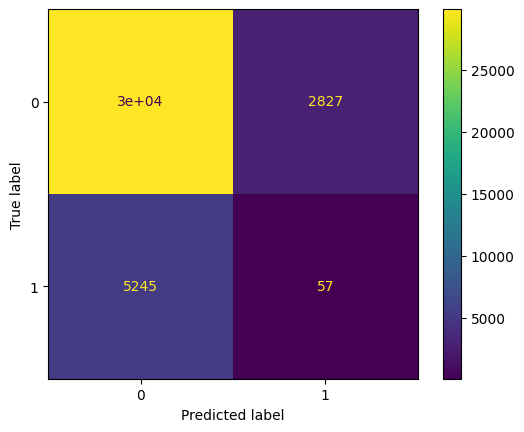

,Explanation,Metric Result
0,CholCheck & PhysActivity & Fruits & Veggies & ...,20.893652


In [115]:
# esto se toma su tiempo ejecutando
X_tensor = torch.tensor(X_standardized, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

data = StructuredDataset(X_tensor, y_tensor, dataset_name="diabetes",
                         feature_names=X_filtered.columns, class_names=['not diabetes', 'diabetes'])



train_len(data=data, print_conf_matrix=1, target_class=1, epoch=100)

In [61]:
X_filtered.loc[:, 'BMI < 18'] = X_filtered['BMI'] < 18
X_filtered.loc[:, '18 <= BMI < 25'] = (X_filtered['BMI'] >= 18) & (X_filtered['BMI'] < 25)
X_filtered.loc[:, '25 <= BMI < 30'] = (X_filtered['BMI'] >= 25) & (X_filtered['BMI'] < 30)
X_filtered.loc[:, 'BMI >= 30'] = X_filtered['BMI'] >= 30

# Create boolean columns based on intervals for 'PhysHlth'
X_filtered.loc[:, 'PhysHlth < 10'] = X_filtered['PhysHlth'] < 10
X_filtered.loc[:, '10 <= PhysHlth <= 20'] = (X_filtered['PhysHlth'] >= 10) & (X_filtered['PhysHlth'] <= 20)
X_filtered.loc[:, 'PhysHlth > 20'] = X_filtered['PhysHlth'] > 20

# Create boolean columns based on intervals for 'MentHlth'
X_filtered.loc[:, 'MentHlth < 10'] = X_filtered['MentHlth'] < 10
X_filtered.loc[:, '10 <= MentHlth <= 20'] = (X_filtered['MentHlth'] >= 10) & (X_filtered['MentHlth'] <= 20)
X_filtered.loc[:, 'MentHlth > 20'] = X_filtered['MentHlth'] > 20

X_filtered = X_filtered.astype('float32')

# Min-Max normalization for 'Age' and 'GenHlth'
X_filtered.loc[:, 'Age'] = (X_filtered['Age'] - X_filtered['Age'].min()) / (X_filtered['Age'].max() - X_filtered['Age'].min())
X_filtered.loc[:, 'GenHlth'] = (X_filtered['GenHlth'] - X_filtered['GenHlth'].min()) / (X_filtered['GenHlth'].max() - X_filtered['GenHlth'].min())


X_filtered = X_filtered.drop(columns=['BMI', 'MentHlth', 'PhysHlth'])

X_tensor = torch.tensor(X_filtered.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

data = StructuredDataset(X_tensor, y_tensor, dataset_name="diabetes",
                         feature_names=X_filtered.columns, class_names=['not diabetes', 'diabetes'])


/tmp/ipykernel_490547/1542033949.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
/tmp/ipykernel_490547/1542033949.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_data = TensorDataset(torch.tensor(x_val), torch.tensor(y_val))
/tmp/ipykernel_490547/1542033949.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data = TensorDataset(torch.tensor(x_test), torch.tensor(y_test))


Epoch: 1/100, Loss: 0.612, Tr_acc: 85.60, Val_acc: 86.07, best_e: -1
Epoch: 2/100, Loss: 0.740, Tr_acc: 86.07, Val_acc: 86.07, best_e: -1
Epoch: 3/100, Loss: 0.475, Tr_acc: 86.07, Val_acc: 86.07, best_e: -1
Epoch: 4/100, Loss: 0.475, Tr_acc: 86.06, Val_acc: 86.08, best_e: -1
Epoch: 5/100, Loss: 0.419, Tr_acc: 86.08, Val_acc: 86.07, best_e: -1
Epoch: 6/100, Loss: 0.391, Tr_acc: 86.07, Val_acc: 86.07, best_e: -1
Epoch: 7/100, Loss: 0.404, Tr_acc: 86.07, Val_acc: 86.07, best_e: -1
Epoch: 8/100, Loss: 0.402, Tr_acc: 86.07, Val_acc: 86.07, best_e: -1
Epoch: 9/100, Loss: 0.385, Tr_acc: 86.07, Val_acc: 86.10, best_e: -1
Epoch: 10/100, Loss: 0.374, Tr_acc: 86.10, Val_acc: 86.09, best_e: -1
Epoch: 11/100, Loss: 0.375, Tr_acc: 85.98, Val_acc: 86.22, best_e: -1
Epoch: 12/100, Loss: 0.378, Tr_acc: 86.15, Val_acc: 86.11, best_e: -1
Epoch: 13/100, Loss: 0.378, Tr_acc: 86.11, Val_acc: 86.07, best_e: -1
Epoch: 14/100, Loss: 0.374, Tr_acc: 86.07, Val_acc: 86.07, best_e: -1
Epoch: 15/100, Loss: 0.369, T

/home/jdum/PycharmProjects/URENA_MELENDEZ_PL/logic_explained_networks/lens/models/base.py:348: UserWarning: Loaded model does not have time or explanations. They need to be recalculated but time will only consider rule extraction time.
  warnings.warn("Loaded model does not have time or explanations. "


Test accuracy: 52.93913611704786


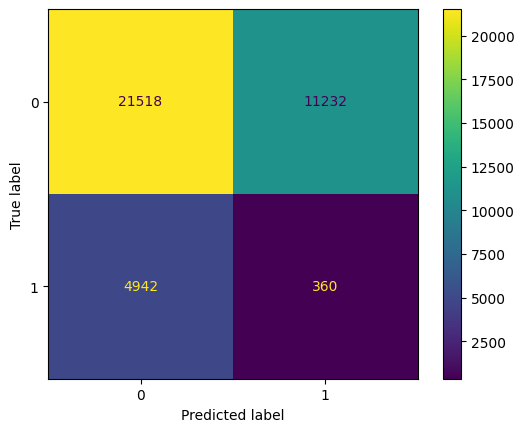

,Explanation,Metric Result
0,CholCheck & AnyHealthcare & ~HighBP & ~HighCho...,40.88986


In [116]:
train_len(data=data, target_class=1, print_conf_matrix=1, epoch=100)

El rendimiento de la explicación no  mejoró significativamente, esto puede ser en gran parte porque el modelo se vé muy influenciado de la clase mayoritaria. 

In [117]:
def create_boolean_columns(df: pd.DataFrame, n: int):
    new_df = df.copy()

    for column in df.columns:
        if df[column].dtype in [int, float]:
            min_val = df[column].min()
            max_val = df[column].max()
            step = (max_val - min_val) / n

            for i in range(n):
                lower_bound = np.round(min_val + i * step, 2)
                upper_bound = np.round(min_val + (i + 1) * step, 2)
                bool_col_name = f"{lower_bound}<={column}<{upper_bound}"
                new_df[bool_col_name] = (df[column] >= lower_bound) & (df[column] < upper_bound)
            new_df.drop(column, axis=1, inplace=True)
    return new_df

In [140]:
def train_len(data: StructuredDataset, print_conf_matrix=0, metric: Metric = F1Score(), target_class=0, epoch=500,
            l_r=0.3, hidden_neurons=40):
    # Dataset splitting into train, validation, and testing with stratification
    x_train, x_test, y_train, y_test = train_test_split(data.x, data.y, test_size=0.3, stratify=data.y, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

    # Convert data to PyTorch tensors
    train_data = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
    val_data = TensorDataset(torch.tensor(x_val), torch.tensor(y_val))
    test_data = TensorDataset(torch.tensor(x_test), torch.tensor(y_test))

    # Model instantiation
    model_mu = lens.models.XMuNN(n_classes=len(torch.unique(data.y)), n_features=data.x.shape[1],
                                    hidden_neurons=[hidden_neurons], loss=torch.nn.CrossEntropyLoss())

    model_relu = lens.models.XReluNN(n_classes=len(torch.unique(data.y)), n_features=data.x.shape[1],
                                        hidden_neurons=[hidden_neurons], loss=torch.nn.CrossEntropyLoss())

    models = [model_mu, model_relu]

    # Training
    i = 0
    for model in models:
        model.fit(train_data, val_data, epochs=epoch, l_r=l_r)

        # Get accuracy on test samples
        test_acc = model_mu.evaluate(test_data, metric=metric)
        print("Test accuracy:", test_acc)

        concept_names = data.feature_names

        # Create a DataFrame to store explanations and their metrics
        explanations_dict = {"Explanation": [], "Metric Result": []}

        for target in range(target_class):
            formula = model.get_global_explanation(x_train, y_train, target,
                                                    top_k_explanations=4, metric=metric, concept_names=concept_names)

            # Compute explanation accuracy
            exp_accuracy, predictions = lens.logic.test_explanation(formula, target, x_test, y_test, metric=metric,
                                                                    concept_names=concept_names)

            # Store the explanation and its metric result in the dictionary
            explanations_dict["Explanation"].append(formula)
            explanations_dict["Metric Result"].append(exp_accuracy)

            if print_conf_matrix:
                print_confusion_matrix(targets=y_test, predictions_np=predictions)
        explanations_df = pd.DataFrame(explanations_dict)
        explanations_df.to_csv(f"""exaplanations_{i}.csv""")
        i += 1

In [125]:
from sklearn.preprocessing import LabelEncoder

In [141]:
dataset = pd.read_csv('Crop_Recommendation.csv')
y = dataset["Crop"].to_numpy()
label_encoder = LabelEncoder()
dataset['Crop'] = label_encoder.fit_transform(dataset['Crop'])
y_encoded = dataset["Crop"].to_numpy()
dataset.drop("Crop", axis=1, inplace=True)


In [142]:
new_dataset = create_boolean_columns(dataset, 3)
X_tensor = torch.tensor(new_dataset.to_numpy(), dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.float32)

In [143]:
dataset = StructuredDataset(X_tensor, y_tensor, dataset_name="crops",
                            feature_names=new_dataset.columns.to_numpy(), class_names=np.unique(y).tolist())


In [144]:
train_len(dataset, target_class=22)

/tmp/ipykernel_490547/2046207098.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
/tmp/ipykernel_490547/2046207098.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_data = TensorDataset(torch.tensor(x_val), torch.tensor(y_val))
/tmp/ipykernel_490547/2046207098.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data = TensorDataset(torch.tensor(x_test), torch.tensor(y_test))


Epoch: 1/500, Loss: 3.332, Tr_acc: 4.29, Val_acc: 21.21, best_e: -1
Epoch: 2/500, Loss: 3.495, Tr_acc: 23.77, Val_acc: 50.91, best_e: -1
Epoch: 3/500, Loss: 9.024, Tr_acc: 49.74, Val_acc: 36.67, best_e: -1
Epoch: 4/500, Loss: 15.033, Tr_acc: 35.26, Val_acc: 27.88, best_e: -1
Epoch: 5/500, Loss: 13.955, Tr_acc: 28.12, Val_acc: 37.58, best_e: -1
Epoch: 6/500, Loss: 11.961, Tr_acc: 34.03, Val_acc: 51.21, best_e: -1
Epoch: 7/500, Loss: 8.947, Tr_acc: 51.49, Val_acc: 47.88, best_e: -1
Epoch: 8/500, Loss: 7.876, Tr_acc: 50.13, Val_acc: 51.21, best_e: -1
Epoch: 9/500, Loss: 6.648, Tr_acc: 54.48, Val_acc: 40.61, best_e: -1
Epoch: 10/500, Loss: 8.553, Tr_acc: 39.29, Val_acc: 53.94, best_e: -1
Epoch: 11/500, Loss: 5.910, Tr_acc: 51.23, Val_acc: 59.09, best_e: -1
Epoch: 12/500, Loss: 4.928, Tr_acc: 56.56, Val_acc: 60.00, best_e: -1
Epoch: 13/500, Loss: 4.073, Tr_acc: 61.04, Val_acc: 58.18, best_e: -1
Epoch: 14/500, Loss: 3.500, Tr_acc: 58.51, Val_acc: 63.94, best_e: -1
Epoch: 15/500, Loss: 2.953,

/home/jdum/PycharmProjects/URENA_MELENDEZ_PL/logic_explained_networks/lens/models/base.py:348: UserWarning: Loaded model does not have time or explanations. They need to be recalculated but time will only consider rule extraction time.
  warnings.warn("Loaded model does not have time or explanations. "


Epoch: 1/500, Loss: 3.121, Tr_acc: 4.55, Val_acc: 13.33, best_e: 1
Epoch: 2/500, Loss: 3.990, Tr_acc: 14.55, Val_acc: 12.12, best_e: 1
Epoch: 3/500, Loss: 4.555, Tr_acc: 12.53, Val_acc: 30.61, best_e: 3
Epoch: 4/500, Loss: 2.768, Tr_acc: 32.53, Val_acc: 39.39, best_e: 4
Epoch: 5/500, Loss: 2.216, Tr_acc: 39.16, Val_acc: 36.97, best_e: 4
Epoch: 6/500, Loss: 2.088, Tr_acc: 38.77, Val_acc: 45.76, best_e: 6
Epoch: 7/500, Loss: 1.808, Tr_acc: 46.82, Val_acc: 52.73, best_e: 7
Epoch: 8/500, Loss: 1.720, Tr_acc: 53.51, Val_acc: 51.21, best_e: 7
Epoch: 9/500, Loss: 1.659, Tr_acc: 51.75, Val_acc: 52.42, best_e: 7
Epoch: 10/500, Loss: 1.581, Tr_acc: 55.39, Val_acc: 56.06, best_e: 10
Epoch: 11/500, Loss: 1.446, Tr_acc: 58.44, Val_acc: 59.70, best_e: 11
Epoch: 12/500, Loss: 1.366, Tr_acc: 61.30, Val_acc: 61.21, best_e: 12
Epoch: 13/500, Loss: 1.280, Tr_acc: 62.34, Val_acc: 61.52, best_e: 13
Epoch: 14/500, Loss: 1.182, Tr_acc: 62.92, Val_acc: 66.06, best_e: 14
Epoch: 15/500, Loss: 1.099, Tr_acc: 67.

/home/jdum/PycharmProjects/URENA_MELENDEZ_PL/logic_explained_networks/lens/models/base.py:348: UserWarning: Loaded model does not have time or explanations. They need to be recalculated but time will only consider rule extraction time.
  warnings.warn("Loaded model does not have time or explanations. "
